In [ ]:
#mount google drive with colab

In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!unzip PlantVillage.zip

Archive:  PlantVillage.zip
   creating: PlantVillage/
   creating: PlantVillage/Potato___Early_blight/
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG  
  inflating: PlantVillage

In [ ]:
#import all the important libraries

import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [ ]:
DATA_PATH = '/content/drive/MyDrive/PlantVillage'
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [ ]:
# load the dataset

dataset = tf.keras.preprocessing.image_dataset_from_directory(DATA_PATH, shuffle = True,
                                                              image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
# get all the class names

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
# Exploring the dataset

for image_batch , label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 2 0 0 0 2 1 0]


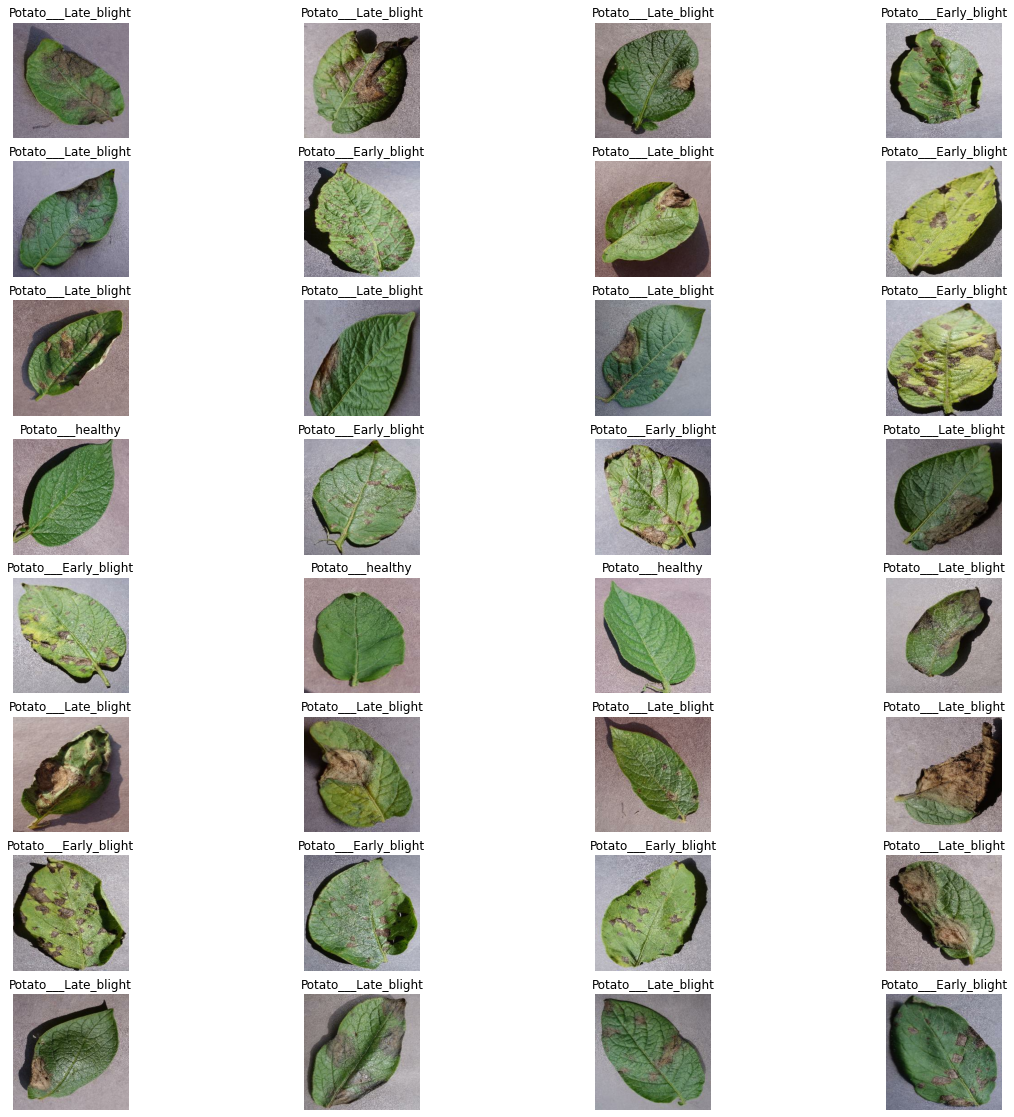

In [ ]:
plt.figure(figsize=(20,20))
for image_batch , label_batch in dataset.take(1):
  for i in range(32):
    ax=plt.subplot(8,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

1. training-dataset to be used while training
2. validation-dataset to be tested against while training
3. test-dataset to be tested against after we trained model

80%-training
10%-validation 10%-testing

In [43]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [44]:
train_ds=dataset.take(54)
len(train_ds)

54

In [45]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [46]:
val_size=0.5
len(test_ds)*val_size

7.0

In [47]:
val_ds=test_ds.take(7)
len(val_ds)

7

In [49]:
test_ds=test_ds.skip(7)
len(test_ds)

7

In [ ]:
#Steps

#1. model architechture
#2. model compilation
#3. model.fit

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(36, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [60]:
from keras.callbacks import ModelCheckpoint

In [62]:
checkpoint=ModelCheckpoint('best_model.h5', monitor='loss', save_best_only=True)

In [50]:
history=model.fit(train_ds, batch_size=BATCH_SIZE, epochs=15, validation_data=val_ds)

Epoch 1/15
54/54 [==============================] - 247s 5s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 0.9955
Epoch 2/15
54/54 [==============================] - 243s 4s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.8296e-04 - val_accuracy: 1.0000
Epoch 3/15
54/54 [==============================] - 247s 5s/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0215 - val_accuracy: 0.9955
Epoch 4/15
54/54 [==============================] - 241s 4s/step - loss: 0.0095 - accuracy: 0.9977 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/15
54/54 [==============================] - 242s 4s/step - loss: 0.0558 - accuracy: 0.9867 - val_loss: 0.0430 - val_accuracy: 0.9866
Epoch 6/15
54/54 [==============================] - 241s 4s/step - loss: 0.0611 - accuracy: 0.9769 - val_loss: 0.0501 - val_accuracy: 0.9777
Epoch 7/15
54/54 [==============================] - 239s 4s/step - loss: 0.0531 - accuracy: 0.9832 - val_loss: 0.1535 - val_accuracy: 0.9598
Epoch 8/1

In [65]:
history=model.fit(train_ds, batch_size=BATCH_SIZE, epochs=2, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/2
54/54 [==============================] - 236s 4s/step - loss: 0.0565 - accuracy: 0.9850 - val_loss: 0.3888 - val_accuracy: 0.9375
Epoch 2/2
54/54 [==============================] - 237s 4s/step - loss: 0.0553 - accuracy: 0.9844 - val_loss: 0.3274 - val_accuracy: 0.9420


In [51]:
model.evaluate(test_ds)

7/7 [==============================] - 11s 975ms/step - loss: 0.4705 - accuracy: 0.8550


[0.4704838991165161, 0.8550000190734863]

In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
model.save('potato_class.h5')

In [66]:
# loading a model
import numpy as np
loaded_model=tf.keras.models.load_model('best_model.h5')

image_path='/content/drive/MyDrive/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

test_image=tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
test_image=tf.keras.preprocessing.image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
print(test_image.shape)

pred_value=loaded_model.predict(test_image)
class_names[np.argmax(pred_value)]

(1, 256, 256, 3)


'Potato___Early_blight'